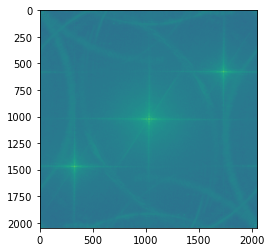

In [13]:
#se importan las librerias
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from win32api import GetSystemMetrics

nm=1e-9
um=1e-6
mm=1e-3
cm=1e-2
wl=633*nm
TamañoSensor=6.513*mm


#Se lee la imagen
hologram=cv2.imread('Hologram.tiff',0)
M,N=np.shape(hologram)


deltax=TamañoSensor/N
deltay=TamañoSensor/M
d=73*mm
deltaeta=wl*d/TamañoSensor
deltaxi=wl*d/TamañoSensor
FFT_Hologram=np.fft.fftshift(np.fft.fft2(hologram))

plt.imshow(np.log(np.abs(FFT_Hologram)))






<ipython-input-14-bceaa50bfb55>:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(FFT_Hologram)))


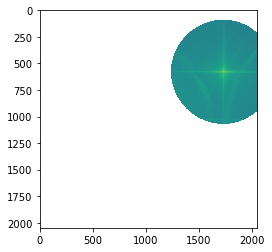

In [14]:
#Creo la mascara circular centrada en el orden 1
mask=np.zeros((M,N),dtype="uint8")
mask=cv2.circle(mask,(1720,580),500,1,-1)
FFT_Hologram=FFT_Hologram*mask
masked_hologram=np.fft.ifft2(np.fft.ifftshift(FFT_Hologram))
x=np.arange(-int(N/2),int(N/2),1)
y=np.arange(-int(M/2),int(M/2),1)
k, l=np.meshgrid(x,y)
m, n=np.meshgrid(x,y)
plt.imshow(np.log(np.abs(FFT_Hologram)))

In [15]:
def PlaneWave(M,N,AnglX,dx,dy,wavelength):
  #Centros de la imagen
    Mcen = int(M/2)
    Ncen = int(N/2)
   #Arreglos de x y y
    x=np.arange(-Mcen,Mcen)
    y=np.arange(-Ncen,Ncen)
   #Malla de la matriz
    X, Y = np.meshgrid(x,y)
   #Vector de una onda
    k= 2*np.pi/wavelength
    #Angulos en X y Y
    Ax=np.sin(AnglX)
    E_0=1


    wave =E_0* np.exp(1j*k*(Ax*X*dx))

    return wave

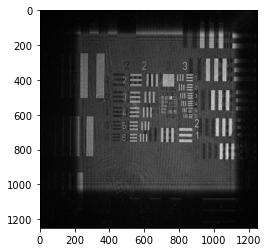

In [18]:
#Reconstrucción
Anglx=0.1
d=73*mm
A=np.exp(1j*2*np.pi*d/wl)/(1j*wl*d)
I_h=masked_hologram
R=PlaneWave(M,N,0.3,deltax,deltay,wl)
#R=1
B=np.exp((1j*np.pi)/(wl*d)*( (m*deltaeta)**2 +(n*deltaxi)**2))
C=np.exp((1j*np.pi)/(wl*d)*((k*deltax)**2 + (l*deltay)**2))
FFT_factor=np.fft.fftshift(np.fft.fft2(R*I_h*C))
IntesityHologram=A*B*FFT_factor
plt.imshow(np.abs(IntesityHologram[0:1250,0:1250]),cmap="gray")